<a href="https://colab.research.google.com/github/pkong0414/Deep-Learning-Projects/blob/master/Clock_Final_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.models import *
from keras.layers import *
import os, shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

#use this when you use google colab only!
from google.colab import files, drive
import glob
import pandas as pd
import io
import numpy as np
import cv2
from PIL import Image
import pathlib


import tensorflow as tf


Using TensorFlow backend.


In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
!ls "/content/drive/My Drive/Colab Notebooks/Clocks"

'All Clocks.csv'  'Digital Clock'   test_analog.csv    test_val_analog.csv
'All Clocks.zip'   temp		    test_digital       test_val_digital.csv
'Analog Clock'	   test_analog	    test_digital.csv   test_validation.csv


In [4]:
!ls "/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test"

pic_100.JPG  pic_25.JPG  pic_40.JPG  pic_56.JPG  pic_71.JPG  pic_87.JPG
pic_10.JPG   pic_26.JPG  pic_41.JPG  pic_57.JPG  pic_72.JPG  pic_88.JPG
pic_11.JPG   pic_27.JPG  pic_42.JPG  pic_58.JPG  pic_73.JPG  pic_89.JPG
pic_12.JPG   pic_28.JPG  pic_43.JPG  pic_59.JPG  pic_74.JPG  pic_8.JPG
pic_13.JPG   pic_29.JPG  pic_44.JPG  pic_5.JPG	 pic_75.JPG  pic_90.JPG
pic_14.JPG   pic_2.JPG	 pic_45.JPG  pic_60.JPG  pic_76.JPG  pic_91.JPG
pic_15.JPG   pic_30.JPG  pic_46.JPG  pic_61.JPG  pic_77.JPG  pic_92.JPG
pic_16.JPG   pic_31.JPG  pic_47.JPG  pic_62.JPG  pic_78.JPG  pic_93.JPG
pic_17.JPG   pic_32.JPG  pic_48.JPG  pic_63.JPG  pic_79.JPG  pic_94.JPG
pic_18.JPG   pic_33.JPG  pic_49.JPG  pic_64.JPG  pic_7.JPG   pic_95.JPG
pic_19.JPG   pic_34.JPG  pic_4.JPG   pic_65.JPG  pic_80.JPG  pic_96.JPG
pic_1.JPG    pic_35.JPG  pic_50.JPG  pic_66.JPG  pic_81.JPG  pic_97.JPG
pic_20.JPG   pic_36.JPG  pic_51.JPG  pic_67.JPG  pic_82.JPG  pic_98.JPG
pic_21.JPG   pic_37.JPG  pic_52.JPG  pic_68.JPG  pic_83.JPG  pic_99

In [0]:
#file directory for analog
base_A_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/Analog Clock/train"

#file directory for digital
base_test_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test"

#file directory for target (labels)
base_LA_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_val_analog.csv"
base_LT_dir = "/content/drive/My Drive/Colab Notebooks/Clocks/test_analog.csv"


#open files from drive mount in google colab for correct picture names and lables
file_csv = open(base_LA_dir, 'r')
file2_csv = open(base_LT_dir, 'r')

In [0]:
def getfiles( csv ):
  labels = []
  labels2 = []
  filenames = []
  text = []
  text2 = []

  for files in csv:
    text = files.split( "," )
    text2 = files.split( "," )
    labels.append( text[1].strip( '\n' ) )
    labels2.append( text2[1].strip( '\n' ) )
    filenames.append( text[0].strip( '\ufeff' ) )
    
  return labels, labels2, filenames

def getTrainAnalogFilepath( file ):
  temp = []
  analog = []

  for items in file:
    temp = os.path.join( base_A_dir, items )
    analog.append( temp )

  return analog

def getTestFilepath( file ):
  temp = []
  analog = []

  for items in file:
    temp = os.path.join( base_test_dir, items )
    analog.append( temp )

  return analog


def annotateTime( file ):
    time = []
    timeL = []
    theta = np.zeros( ( 720, 2 ), dtype = 'float64' )
    radius = np.zeros( ( 720, 2 ), dtype = 'float64' )
    annotate_Hour = np.zeros( ( 720, 2 ), dtype = 'float64' )
    annotate_Min = np.zeros( ( 720, 2 ), dtype = 'float64' )

    hour = 0.0
    minute = 0.0

    #this will read from the csv labels and calculate the appropriate theta
    #for the minute hand

    #this will read the label and calculate the theta for the
    #hour hand now

    thetaH = []
    thetaM = []
    Hour = []
    Min = []
    for i in range( len( file ) ):

      time =  file[ i ].split( ':' )
      hour = int( time[ 0 ] )
      minute = int( time[ 1 ] )
      if ( time[ 0 ] == '12' ):
        hour = 0
      annotate_Hour[ i ][ 1 ] = float( 0.5 * minute ) + float( 30 * hour )
      annotate_Hour[ i ][ 0 ] = 2
      annotate_Min[ i ][ 1 ] = float( 6 * minute )
      annotate_Min[ i ][ 0 ] = 4


      timeL.append( str( time[ 0 ] + time[ 1 ] ) )



      X = np.full([100, 100, 1], annotate_Hour[i][1])
      X = np.expand_dims(X, axis = 0)
      thetaH.append(X)
      Z = np.full([100, 100, 1], annotate_Min[i][1])
      Z = np.expand_dims(Z, axis = 0)
      thetaM.append(Z)
    thetaH = np.concatenate(thetaH, axis = 0)
    thetaM = np.concatenate(thetaM, axis = 0)
    
    return thetaH, thetaM
  
def annotateTestTime( file ):
  time = []
  timeL = []
  theta = np.zeros( ( 100, 2 ), dtype = 'float64' )
  radius = np.zeros( ( 100, 2 ), dtype = 'float64' )
  annotate_Hour = np.zeros( ( 100, 2 ), dtype = 'float64' )
  annotate_Min = np.zeros( ( 100, 2 ), dtype = 'float64' )

  hour = 0.0
  minute = 0.0

  #this will read from the csv labels and calculate the appropriate theta
  #for the minute hand

  #this will read the label and calculate the theta for the
  #hour hand now

  thetaH = []
  thetaM = []
  Hour = []
  Min = []
  for i in range( len( file ) ):

    time =  file[ i ].split( ':' )
    hour = int( time[ 0 ] )
    minute = int( time[ 1 ] )
    if ( time[ 0 ] == '12' ):
      hour = 0
    annotate_Hour[ i ][ 1 ] = float( 0.5 * minute ) + float( 30 * hour )
    annotate_Hour[ i ][ 0 ] = 2
    annotate_Min[ i ][ 1 ] = float( 6 * minute )
    annotate_Min[ i ][ 0 ] = 4


    timeL.append( str( time[ 0 ] + time[ 1 ] ) )



    X = np.full([100, 100, 1], annotate_Hour[i][1])
    X = np.expand_dims(X, axis = 0)
    thetaH.append(X)
    Z = np.full([100, 100, 1], annotate_Min[i][1])
    Z = np.expand_dims(Z, axis = 0)
    thetaM.append(Z)
  thetaH = np.concatenate(thetaH, axis = 0)
  thetaM = np.concatenate(thetaM, axis = 0)
    
  return thetaH, thetaM
  
def getHour( file ):
  temp =[]
  temp2  = []
  temp3 = []
  for item in file:
    temp = item.split(":") 
    temp2 = int(temp[0]) - 1
    temp3.append( temp2 )
  return temp3

In [0]:
train_A_labels, train_A_labels2, train_A_filenames = getfiles(file_csv)

In [0]:
test_A_labels, test_A_labels2, test_A_filenames = getfiles( file2_csv )

In [0]:
print(train_A_labels)

In [0]:
print(train_A_labels2)

In [0]:
print(train_A_filenames)

In [0]:
test_img_analog = []
test_img_analog = getTestFilepath( test_A_filenames )

In [9]:
print( test_img_analog )

['/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_1.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_2.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_3.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_4.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_5.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_6.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_7.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_8.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_9.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_10.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_11.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_12.JPG', '/content/drive/My Drive/Colab Notebooks/Clocks/test_analog/test/pic_13.

In [0]:
image_analog = getTrainAnalogFilepath( train_A_filenames )

In [0]:
print( image_analog )

In [0]:
tH,tM = annotateTime( train_A_labels )

In [0]:
print( tH.shape )

In [0]:
print( tM.shape )

In [0]:
testH,testM = annotateTestTime( test_A_labels )

In [11]:
print( testH.shape )

(100, 100, 100, 1)


In [12]:
print( testM.shape )

(100, 100, 100, 1)


In [0]:
train = getHour( train_A_labels2 )

In [0]:
print( train[60] )

In [0]:
test = getHour( test_A_labels2 )

In [14]:
print( test[60] )

8


In [0]:
target_dataset = []
target_dataset = keras.utils.to_categorical( train, 12 )
print( target_dataset[0] )
print( target_dataset.shape )

In [0]:
print( target_dataset[60] )

In [15]:
y_test = []
y_test = keras.utils.to_categorical( test, 12 )
print( y_test[0] )
print( y_test.shape )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(100, 12)


In [0]:
def loadImages( file ):
  imgs = []
  for images in file:
    img = image.load_img( images, target_size =( 100, 100 ), color_mode = "grayscale" )
    image_tensor = image.img_to_array( img )
    image_tensor = np.expand_dims( image_tensor, axis = 0 )
    image_tensor /= 255.0
    imgs.append(image_tensor)

  imgs = np.concatenate(imgs, axis = 0)
  
  return imgs

In [0]:
train_imgs = []
train_imgs = loadImages( image_analog )

In [0]:
plt.matshow( train_imgs[0, :, :, 0] )

In [0]:
dataset = []
dataset = np.concatenate( [ train_imgs, tH, tM ], axis = -1 )

In [0]:
print( dataset.shape )

In [0]:
images = []
images = loadImages( test_img_analog )

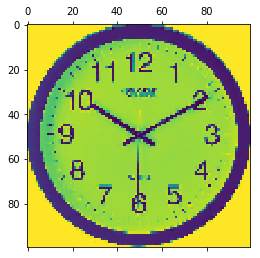

In [18]:
plt.matshow( images[0, :, :, 0] )

In [0]:
x_test = []
x_test = np.concatenate( [ images, testH, testM ], axis = -1 )

In [20]:
print( x_test.shape )

(100, 100, 100, 3)


In [0]:
from sklearn.utils import shuffle

dataset, target_dataset = shuffle(dataset, target_dataset)

In [0]:

k = 4
num_val_samples = 720 // k
num_scores = []

for i in range( k ):
  print( 'processing fold #', i )
  val_data = dataset[ ( i * num_val_samples ) :  (i + 1) * num_val_samples ]
  val_targets = target_dataset[ i * num_val_samples: (i + 1) * num_val_samples ]
  
  partial_train_data = np.concatenate(
    [ dataset[ :i * num_val_samples ],
     dataset[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )
  
  partial_train_targets = np.concatenate(
    [ target_dataset[ :i * num_val_samples ],
     target_dataset[ ( i + 1 ) * num_val_samples: ] ],
    axis = 0 )

  
x_input = partial_train_data
y_output = partial_train_targets
x_val = val_data
y_val = val_targets

In [0]:
print( "x_input shape: ", x_input.shape )
print( "y_output shape: ", y_output.shape )
print( "x_val shape: ", x_val.shape )
print( "y_val shape: ", y_val.shape )

In [0]:
plt.imshow(x_input[0, :, :, 0])
plt.show()
plt.imshow(x_val[0, :, :, 0])
plt.show()
print(y_val[0])
print(x_input[0, :5, :5, 0])
print(x_val[0, :5, :5, 0])
print(y_val[0])
print(y_val[100])

In [0]:
def residual_unit( inputs, filters, kernel, drop_out = 0.0, pooling = False ):
  res = inputs
  
  if pooling == True:
    res = Conv2D( filters, kernel_size = 1, strides = ( 2, 2) )( res )
    inputs = MaxPooling2D( pool_size = ( 2, 2 ) )(inputs)
    
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  inputs = Dropout( drop_out )( inputs )
  
  inputs = BatchNormalization()( inputs )
  inputs = Conv2D( filters, kernel, padding = 'same' )( inputs )
  inputs = Activation( "relu" )( inputs )
  
  inputs = keras.layers.add( [ inputs, res ] )
  
  return inputs


In [0]:
input_shape = Input( shape = x_input[ 0, :, :, :].shape )

inputs = input_shape

inputs = Conv2D( 16, 3, padding = 'same' )( inputs )
inputs = residual_unit( inputs, 16, 3 )

inputs = residual_unit( inputs, 32, 3, 0.3, True )
inputs = residual_unit( inputs, 32, 3 )

inputs = residual_unit( inputs, 64, 3, 0.3, True )
inputs = residual_unit( inputs, 64, 3 )

inputs = BatchNormalization()( inputs )
inputs = Conv2D( 128, 3 )( inputs )
inputs = Activation( "relu" )( inputs )

inputs = Flatten()( inputs )
inputs = Dense( 128 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 64 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 32 )( inputs )
inputs = Activation( "sigmoid" )( inputs )
inputs = Dense( 12 )( inputs )
prediction = Activation( "softmax" )( inputs )
model = Model( input_shape, prediction )


a = keras.callbacks.ModelCheckpoint( filepath='/content/drive/My Drive/cody_clock_ai_v0.1.h5', monitor='val_acc', save_best_only=True )
b = keras.callbacks.EarlyStopping( monitor = 'val_acc', patience = 100 )

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
history = model.fit( x_input , y_output, epochs=1000, batch_size = 200, 
              callbacks = [ a, b ], validation_data = ( x_val, y_val ) )

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [22]:
model_demo = load_model( '/content/drive/My Drive/cody_clock_ai_v0.1.h5' )

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
from sklearn.utils import shuffle

x_test, y_test = shuffle(x_test, y_test)

In [24]:
score = model_demo.evaluate( x_test, y_test )
print( "\n%s: %.2f%%" % ( model_demo.metrics_names[1], score[1]*100 ) )

100/100 [==============================] - 4s 39ms/step

acc: 100.00%


In [0]:
p = model_demo.predict(x_test[1:2])

In [34]:
print(p.round())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [33]:
print(y_test[1:2])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
